## **Name: EDA & Train**

**Overview:** Exploratory Data Analysis (EDA) for initial discovery, and to help identify training parameters
                
**Data Scientist:** Aaron Medina

**GitHub:**

**Creation Date:** 10/27/2022

**Instance:** Local

**References:** 

**Script Change Notes:**

#/#/####: Aaron - Note

In [1]:
# Import required packages
import pickle
import warnings
import matplotlib.pyplot as plt

import pyLDAvis
import pyLDAvis.sklearn
from wordcloud import WordCloud
from __future__ import print_function
from sklearn.decomposition import LatentDirichletAllocation

pyLDAvis.enable_notebook()

/home/docker/miniconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [4]:
# Initialize parameters
train_corpus_path = 'data/train_corpus.pkl'
tf_vectorizer_model_path = 'models/tf_vectorizer_model.pkl'
tfidf_vectorizer_model_path = 'models/tfidf_vectorizer_model.pkl'
train_dtm_tfidf_path = 'data/train_dtm_tfidf.pkl'
topic_dict_path = 'data/topic_dict.pkl'
lda_model_path = 'models/lda_model.pkl'

num_topics = 3
random_state = 42

In [3]:
# Load data and NLP models
train_corpus = pickle.load(open(train_corpus_path, "rb"))
train_dtm_tfidf = pickle.load(open(train_dtm_tfidf_path, "rb"))
tf_vectorizer_model = pickle.load(open(tf_vectorizer_model_path, "rb"))
tfidf_vectorizer_model = pickle.load(open(tfidf_vectorizer_model_path, "rb"))

### EDA

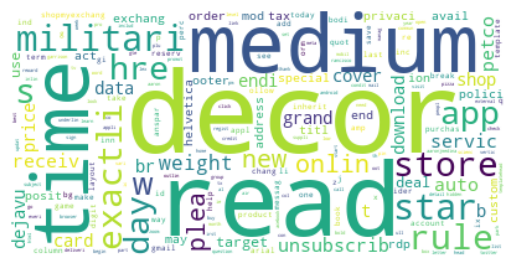

In [4]:
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# Create word cloud to get general idea of highest word frequencies
text = " ".join(train_corpus)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
warnings.filterwarnings("ignore") 

# Train LDA model
lda_model = LatentDirichletAllocation(n_components = num_topics, random_state = random_state)
lda_model.fit(train_dtm_tfidf)

LatentDirichletAllocation(n_components=3, random_state=42)

In [8]:
# Generate LDA visualization and tuning interaction
pyLDAvis.sklearn.prepare(lda_model, train_dtm_tfidf, tfidf_vectorizer_model)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.051289  0.063456       1        1  51.588354
0     -0.081126  0.012268       2        1  27.976934
2      0.029837 -0.075724       3        1  20.434711, topic_info=           Term       Freq      Total Category  logprob  loglift
9396      petco  61.000000  61.000000  Default  30.0000  30.0000
7809   militari  30.000000  30.000000  Default  29.0000  29.0000
12022      star  29.000000  29.000000  Default  28.0000  28.0000
12134     store  24.000000  24.000000  Default  27.0000  27.0000
4379    exchang  17.000000  17.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
2511        com   8.013487  38.378728   Topic3  -5.8919   0.0216
11320    servic   6.639226  22.958836   Topic3  -6.0800   0.3472
12776      time   6.647889  26.831793   Topic3  -6.0787   0.1926
923       avail   5.916254  13.424822   Topic3  -6.1953   0.7685
4598        get   5.924385  22.862401   Topic3  -6.1939   0.2375

[191 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
113        1  0.568299      act
113        2  0.397809      act
167        1  0.903953      ado
169        1  0.964825     adob
264        1  0.876006      air
...      ...       ...      ...
13960      1  0.929645    wendi
14177      1  0.902550  wrapper
14413      1  0.910529     york
14522      3  0.676864     zero
14591      1  1.007835     zoom

[259 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [2]:
# Declare the assignments of topics based on review, save dictionary for inference mapping
### 3 Topics ###
# 0 - articles / personal connections
# 1 - offers / promotions
# 2 - social media / subscriptions

topic_dict = {0 : "articles / connections", 
                1 : "social media / subscriptions", 
                2 : "offers / promotions"}

In [5]:
# Save topic mappings and model
pickle.dump(topic_dict, open(topic_dict_path, "wb"))
pickle.dump(lda_model, open(lda_model_path, "wb"))